In [1]:
#Definimos el campo Vectorial
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 6.0
k2 = 4.0
# Natural lengths
L1 = 0.0
L2 = 0.0
 #Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 2.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25.0
numpoints = 1250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print  ( t1, w1[0], w1[1], w1[2], w1[3], np.abs((w1[0]-np.cos(np.sqrt(2)*t1))/np.cos(np.sqrt(2)*t1)), np.abs((w1[2]-2*np.cos(np.sqrt(2)*t1))/(2*np.cos(np.sqrt(2)*t1))),file=f)

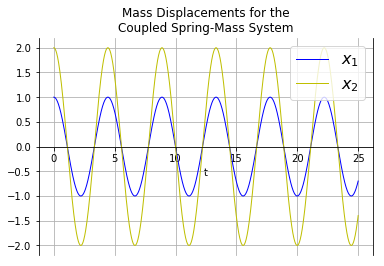

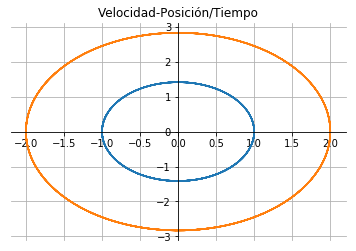

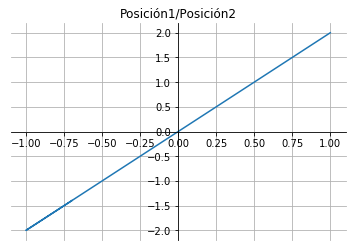

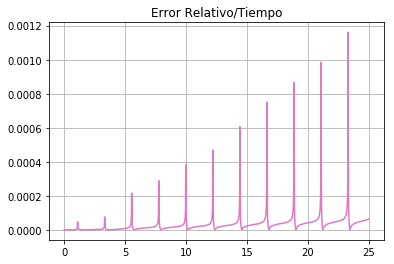

In [4]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, show
from matplotlib.font_manager import FontProperties
%matplotlib inline 
t, x1, y1, x2, y2, e1, e2 = loadtxt('two_springs1.dat', unpack=True)

figure(1, figsize=(6, 4.5))
import math
import numpy as np
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'y', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs1.png', dpi=100)

# gráfica nueva con ejes centrados (Velocidad-Posición Vs Tiempo)
import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derhca
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
title('Velocidad-Posición/Tiempo')
mpl.grid()
mpl.plot(x1,y1)
mpl.plot(x2,y2)
mpl.savefig('vel_x_1.png', dpi=100)
mpl.show()

#Gráfica de x1 Vs x2

import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derecha
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
title('Posición1/Posición2')
mpl.grid()
mpl.plot(x1,x2)
mpl.savefig('x1vsx2_1.png', dpi=100)
mpl.show()


#Graficar Error Relativo Vs Tiempo
import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl

title('Error Relativo/Tiempo')
mpl.plot(t,e1,'tab:pink')
mpl.grid(True)
mpl.savefig("errorrelativo1.png")
mpl.show()
